In [1]:
import sys
sys.path.append('../..')

In [16]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from DomainPrediction.utils import helper

In [4]:
data_path = '../../../Data/al_test_experiments/Tdomain'

In [5]:
df = pd.read_csv(os.path.join(data_path, 'Tdomainr2.csv'))

In [6]:
df.head()

,Name,Sequence,Peak Area,norm_WT
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,34184750.00,1.000000
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,33586017.00,0.982485
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,59143934.67,0.968661
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,2499471.00,0.039853
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,15653904.33,0.457921


In [7]:
wt = helper.read_fasta(os.path.join(data_path, 'Tdomain_WT.fasta'), mode='str')[0]

In [8]:
len(wt)

115

In [13]:
## sanilty check sequences
check_seqs = helper.read_fasta(os.path.join(data_path, 'round_1_extraction.fasta'), mode='str')
for i, seq in enumerate(check_seqs):
    assert df['Sequence'][i] == seq

In [14]:
def hamming_distance(seq1, seq2):
    # Ensure the sequences are of the same length
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length to compute Hamming distance.")
    
    # Count differences
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

In [28]:
dist_matrix = np.eye(df['Sequence'].shape[0])
sequences = df['Sequence'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = hamming_distance(sequences[i], sequences[j])

In [34]:
dist_matrix[0,:]

array([ 0., 44., 45., 46., 43., 41., 54., 46., 52., 60., 59., 58.,  2.,
        3.,  3.,  5.,  6.,  2.,  1.,  6.,  4.,  1.,  3.,  1.,  2.,  2.,
        5.,  5., 26., 33.,  7., 33.,  1.,  1.,  5.,  5., 26., 33.,  7.,
       33.,  1.,  1., 45., 46., 47., 45., 46., 45., 47., 45., 48., 46.,
       46., 46., 46., 45., 47., 45., 45., 45., 44., 45., 45., 45., 47.,
       46.,  0.,  0.,  1.,  1.,  4.,  1.,  1.,  0.,  1.,  2.,  0.,  0.,
        0.,  2.,  0.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,  4.])

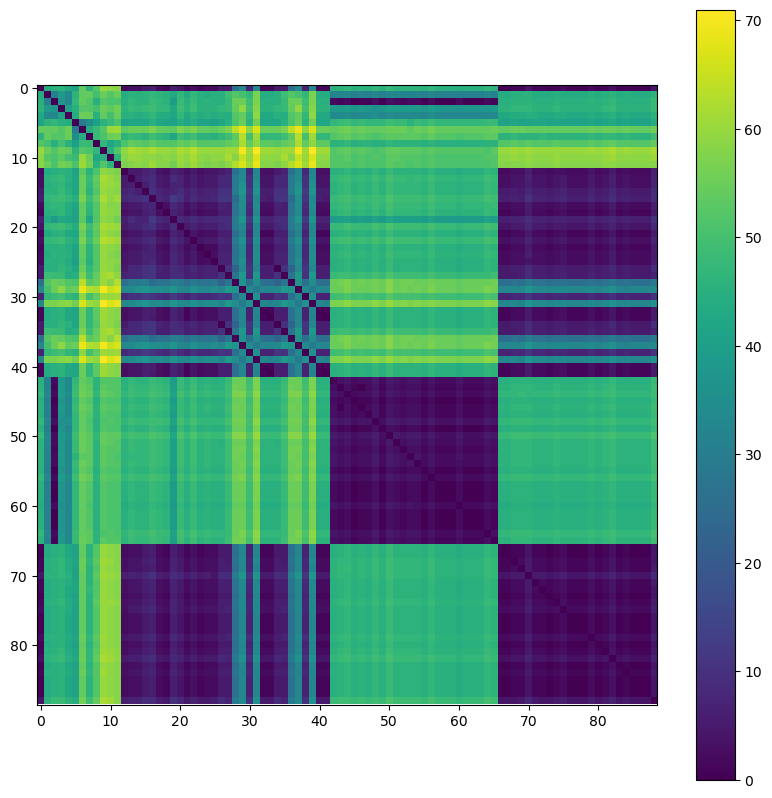

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(dist_matrix)
plt.colorbar()
plt.show()

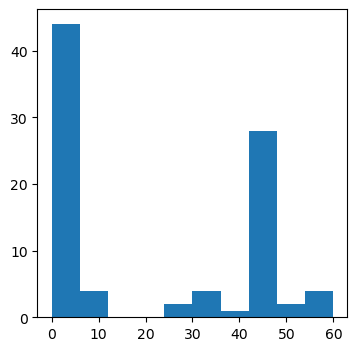

[ 0 44 45 46 43 41 54 46 52 60 59 58  2  3  3  5  6  2  1  6  4  1  3  1
  2  2  5  5 26 33  7 33  1  1  5  5 26 33  7 33  1  1 45 46 47 45 46 45
 47 45 48 46 46 46 46 45 47 45 45 45 44 45 45 45 47 46  0  0  1  1  4  1
  1  0  1  2  0  0  0  2  0  1  3  0  1  0  0  0  4]
['WT' 'ESM1' 'ESM2' 'ESM3' 'ESM4' 'IN1' 'IN2' 'IN3' 'IN4' 'IN5' 'IN6'
 'IN7' 'GxpS_DESIGN-1' 'GxpS_DESIGN-3' 'GxpS_DESIGN-4' 'GxpS_DESIGN-5'
 'GxpS_DESIGN-6' 'GxpS_DESIGN-7' 'GxpS_DESIGN-8' 'GxpS_DESIGN-9'
 'GxpS_DESIGN-11' 'GxpS_DESIGN-14' 'GxpS_DESIGN-16' 'GxpS_DESIGN-17'
 'GxpS_DESIGN-18' 'GxpS_DESIGN-19' 'GxpS_DESIGN-20' 'GxpS_DESIGN-21'
 'GxpS_DESIGN-22' 'GxpS_DESIGN-23' 'GxpS_DESIGN-24' 'GxpS_DESIGN-25'
 'GxpS_DESIGN-26' 'GxpS_DESIGN-27' 'GxpS_DESIGN-20' 'GxpS_DESIGN-21'
 'GxpS_DESIGN-22' 'GxpS_DESIGN-23' 'GxpS_DESIGN-24' 'GxpS_DESIGN-25'
 'GxpS_DESIGN-26' 'GxpS_DESIGN-27' 'ESM2_EP_10_1_1' 'ESM2_EP_10_1_4'
 'ESM2_EP_10_1_5' 'ESM2_EP_10_1_6' 'ESM2_EP_10_1_8' 'ESM2_EP_10_1_9'
 'ESM2_EP_10_1_10' 'ESM2_EP_10_1_11' 'E

In [48]:
dist_from_wt = []
for seq in df['Sequence']:
    dist_from_wt.append(hamming_distance(wt, seq))

fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.hist(dist_from_wt)
plt.show()
print(np.array(dist_from_wt))
print(df['Name'].to_numpy())

In [57]:
df['split_id'] = 2
df.loc[df['Name'].str.contains("ESM2"), 'split_id'] = 0
val_names = ['ESM2', 'ESM2_EP_10_1_1', 'ESM2_EP_10_1_4', 'ESM2_EP_10_1_5', 
             'ESM2_EP_10_1_6', 'ESM2_EP_10_1_8', 'ESM2_EP_10_1_9']
df.loc[df['Name'].isin(val_names), 'split_id'] = 1

In [59]:
df.head()

,Name,Sequence,Peak Area,norm_WT,split_id
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,34184750.00,1.000000,2
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,33586017.00,0.982485,2
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,59143934.67,0.968661,1
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,2499471.00,0.039853,2
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,15653904.33,0.457921,2


In [61]:
df.loc[df['split_id']==1, 'Name'].to_numpy()

array(['ESM2', 'ESM2_EP_10_1_1', 'ESM2_EP_10_1_4', 'ESM2_EP_10_1_5',
       'ESM2_EP_10_1_6', 'ESM2_EP_10_1_8', 'ESM2_EP_10_1_9'], dtype=object)

In [62]:
df.loc[df['split_id']==0, 'Name'].to_numpy()

array(['ESM2_EP_10_1_10', 'ESM2_EP_10_1_11', 'ESM2_EP_10_1_12',
       'ESM2_EP_10_1_13', 'ESM2_EP_10_1_14', 'ESM2_EP_10_1_15',
       'ESM2_EP_10_1_16', 'ESM2_EP_10_1_17', 'ESM2_EP_10_1_18',
       'ESM2_EP_10_1_19', 'ESM2_EP_10_1_20', 'ESM2_EP_10_1_21',
       'ESM2_EP_10_1_22', 'ESM2_EP_10_1_23', 'ESM2_EP_10_1_24',
       'ESM2_EP_10_1_25', 'ESM2_EP_10_1_27', 'ESM2_EP_10_1_28'],
      dtype=object)

In [80]:
df_new = df[['Name', 'Sequence', 'norm_WT', 'split_id']].copy()
df_new.columns = ['name', 'seq', 'fitness_raw', 'split_id']

In [81]:
df_new.head()

,name,seq,fitness_raw,split_id
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,0.968661,1
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.039853,2
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2


In [82]:
n_muts = []
for i, row in df_new.iterrows():
    variant_seq = row["seq"]
    assert len(variant_seq) == len(wt)
    n = 0
    for a, b in zip(variant_seq, wt):
        if a != b:
            n += 1
    
    n_muts.append(n)

df_new['n_mut'] = n_muts

In [83]:
df_new.head()

,name,seq,fitness_raw,split_id,n_mut
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2,44
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,0.968661,1,45
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.039853,2,46
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2,43


In [84]:
df_new['n_mut'].unique()

array([ 0, 44, 45, 46, 43, 41, 54, 52, 60, 59, 58,  2,  3,  5,  6,  1,  4,
       26, 33,  7, 47, 48])

In [85]:
df_new['n_mut'].to_numpy()

array([ 0, 44, 45, 46, 43, 41, 54, 46, 52, 60, 59, 58,  2,  3,  3,  5,  6,
        2,  1,  6,  4,  1,  3,  1,  2,  2,  5,  5, 26, 33,  7, 33,  1,  1,
        5,  5, 26, 33,  7, 33,  1,  1, 45, 46, 47, 45, 46, 45, 47, 45, 48,
       46, 46, 46, 46, 45, 47, 45, 45, 45, 44, 45, 45, 45, 47, 46,  0,  0,
        1,  1,  4,  1,  1,  0,  1,  2,  0,  0,  0,  2,  0,  1,  3,  0,  1,
        0,  0,  0,  4])

In [86]:
assert (df_new['n_mut'].to_numpy() == dist_matrix[0]).all()

In [87]:
from collections import Counter

In [88]:
for split in df_new['split_id'].unique():
    temp = df_new.loc[df_new['split_id']==split, 'n_mut'].unique()
    print(f'n mutation for split {split}: {temp}')
    print(Counter(df_new.loc[df_new['split_id']==split, 'n_mut']))

n mutation for split 2: [ 0 44 46 43 41 54 52 60 59 58  2  3  5  6  1  4 26 33  7]
Counter({1: 14, 0: 12, 2: 6, 5: 5, 3: 4, 33: 4, 4: 3, 46: 2, 6: 2, 26: 2, 7: 2, 44: 1, 43: 1, 41: 1, 54: 1, 52: 1, 60: 1, 59: 1, 58: 1})
n mutation for split 1: [45 46 47]
Counter({45: 4, 46: 2, 47: 1})
n mutation for split 0: [47 45 48 46 44]
Counter({45: 8, 46: 5, 47: 3, 48: 1, 44: 1})


In [93]:
df_new.loc[(df_new['n_mut'] == 0) & (df_new['name'] != 'WT'), ['name', 'n_mut', 'fitness_raw']]

,name,n_mut,fitness_raw
66,WT_EP_10_1_31,0,1.110265
67,WT_EP_10_1_33,0,1.805441
73,WT_EP_10_1_39,0,0.840349
76,WT_EP_10_1_42,0,0.889545
77,WT_EP_10_1_43,0,0.633967
78,WT_EP_10_1_44,0,0.709399
80,WT_EP_10_1_46,0,0.551636
83,WT_EP_10_1_50,0,0.652473
85,WT_EP_10_1_53,0,0.640850
86,WT_EP_10_1_54,0,0.870385


In [95]:
## removing the above sequences
mask = (df_new['n_mut'] == 0) & (df_new['name'] != 'WT')
df_new = df_new[~mask]

In [96]:
temp = []
for x in df_new['fitness_raw']:
    if x == 0:
        temp.append(1e-6)
    else:
        temp.append(x)

In [97]:
df_new['fitness_log'] = np.log(temp)

In [98]:
file = os.path.join(data_path, 'dataset_tdomain.csv')
df_new.to_csv(file, index=False)

In [99]:
file = os.path.join(data_path, 'dataset_tdomain.csv')
df_new = pd.read_csv(file)

Text(0.5, 1.0, 'Test')

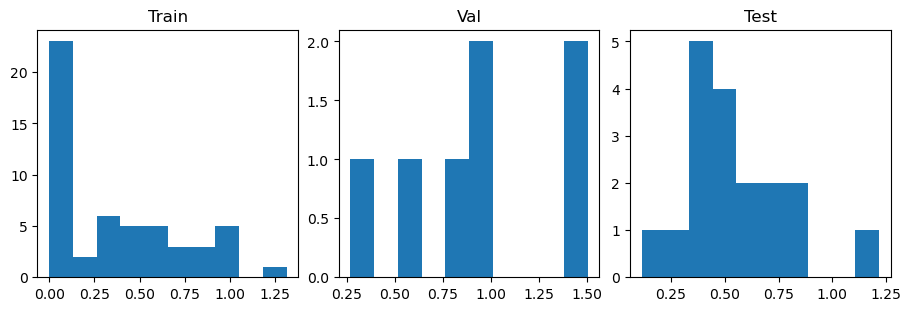

In [100]:
fig, ax = plt.subplots(1, 3, figsize=(9,3), layout='constrained')
ax[0].hist(df_new.loc[df_new['split_id']==2, 'fitness_raw'])
ax[1].hist(df_new.loc[df_new['split_id']==1, 'fitness_raw'])
ax[2].hist(df_new.loc[df_new['split_id']==0, 'fitness_raw'])
ax[0].set_title('Train')
ax[1].set_title('Val')
ax[2].set_title('Test')

Text(0.5, 1.0, 'Test')

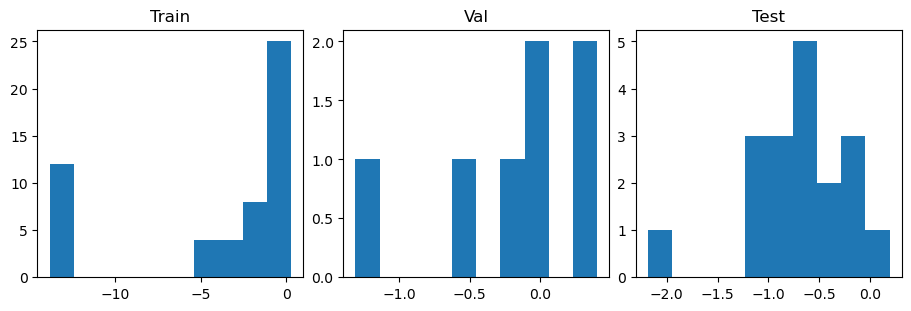

In [101]:
fig, ax = plt.subplots(1, 3, figsize=(9,3), layout='constrained')
ax[0].hist(df_new.loc[df_new['split_id']==2, 'fitness_log'])
ax[1].hist(df_new.loc[df_new['split_id']==1, 'fitness_log'])
ax[2].hist(df_new.loc[df_new['split_id']==0, 'fitness_log'])
ax[0].set_title('Train')
ax[1].set_title('Val')
ax[2].set_title('Test')

In [102]:
df_new['n_mut'].unique()

array([ 0, 44, 45, 46, 43, 41, 54, 52, 60, 59, 58,  2,  3,  5,  6,  1,  4,
       26, 33,  7, 47, 48])

In [103]:
df_new[df_new['n_mut']==0]

,name,seq,fitness_raw,split_id,n_mut,fitness_log
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.0,2,0,0.0


In [104]:
df_new.shape

(78, 6)